In [131]:
from mostlyai import MostlyAI
import pandas as pd
from tsl.datasets import AirQuality, MetrLA, PemsBay
from sklearn.model_selection import train_test_split
from Metrics import evaluate_datasets
import os
# get current dir
currentdir = os.getcwd()
print(currentdir)

Generated_path = f'{currentdir}/../../Datasets/GeneratedDatasets/AirQuality/'
TeachForcing_path = f'{currentdir}/../../Datasets/TeachForcingDatasets/'

/Users/paulmagos/Documents/TSGen/Notebooks/Eval


In [132]:
df_AirQuality = AirQuality(impute_nans=True, small=True)
df_AirQuality = df_AirQuality.dataframe()[-2000:].reset_index(drop=True)

df_AirQuality['gen'] = 1

df_AirQuality.columns = df_AirQuality.columns.droplevel('channels')

In [133]:
# syn_AirQuality = pd.read_csv(f'{Generated_path}synteticAirQualityMostlyAI.csv')
syn_AirQuality_dopple = pd.read_csv(f'{Generated_path}synthteticAirQualityDGAN.csv')
syn_AirQuality_GTM = pd.read_csv(f'{Generated_path}synteticAirQualityGTM.csv')
syn_AirQuality_GTLSTM = pd.read_csv(f'{Generated_path}synteticAirQualityGTLSTM.csv')
syn_AirQuality_GRGN = pd.read_csv(f'{Generated_path}synteticAirQualityGRGN.csv')
syn_AirQuality_PAR = pd.read_csv(f'{Generated_path}SynteticAirQualityPam.csv')

# syn_AirQuality.columns = [col.split(",")[0].replace("(", "").replace("'", "") if col != 'gen' else col for col in syn_AirQuality.columns]
# syn_AirQuality_dopple.columns = [col.split(",")[0].replace("(", "").replace("'", "") if col != 'gen' else col for col in syn_AirQuality_dopple.columns]

syn_AirQuality_GRGN['gen'] = 0
syn_AirQuality_GTLSTM['gen'] = 0
syn_AirQuality_GTM['gen'] = 0
syn_AirQuality_PAR['gen'] = 0
syn_AirQuality_dopple['gen'] = 0

In [134]:
results_df = pd.DataFrame()

In [135]:
df_AirQuality.columns = [str(col) for col in df_AirQuality.columns]
syn_AirQuality_GTM.columns = [str(col) for col in syn_AirQuality_GTM.columns]
syn_AirQuality_dopple.columns = [str(col) for col in syn_AirQuality_dopple.columns]
syn_AirQuality_GTLSTM.columns = [str(col) for col in syn_AirQuality_GTLSTM.columns]
syn_AirQuality_GRGN.columns =  [str(col) for col in syn_AirQuality_GRGN.columns]
syn_AirQuality_PAR.columns =  [str(col) for col in syn_AirQuality_PAR.columns]

In [136]:
out = evaluate_datasets(df_AirQuality, df_AirQuality, 'gen')
out['dataset'] = "AirQuality"
out['model'] = "Original"
res = pd.DataFrame(out, ["AirQuality Original"])
results_df = pd.concat([results_df, res], ignore_index = True)

In [137]:
out = evaluate_datasets(df_AirQuality, syn_AirQuality_dopple, 'gen')
out['dataset'] = "AirQuality"
out['model'] = "DGAN"
res = pd.DataFrame(out, ["AirQuality DGAN"])
results_df = pd.concat([results_df, res], ignore_index = True)

In [138]:
out = evaluate_datasets(df_AirQuality, syn_AirQuality_PAR, 'gen')
out['dataset'] = "AirQuality"
out['model'] = "PAR"
res = pd.DataFrame(out, ["AirQuality PAR"])
results_df = pd.concat([results_df, res], ignore_index = True)

In [139]:
out = evaluate_datasets(df_AirQuality, syn_AirQuality_GTM, 'gen')
out['dataset'] = "AirQuality"
out['model'] = "GTM"
res = pd.DataFrame(out, ["AirQuality GTM"])
results_df = pd.concat([results_df, res], ignore_index = True)

In [140]:
out = evaluate_datasets(df_AirQuality, syn_AirQuality_GTLSTM, 'gen')
out['dataset'] = "AirQuality"
out['model'] = "GTLSTM"
res = pd.DataFrame(out, ["AirQuality GTLSTM"])
results_df = pd.concat([results_df, res], ignore_index = True)

In [141]:
out = evaluate_datasets(df_AirQuality, syn_AirQuality_GRGN, 'gen')
out['dataset'] = "AirQuality"
out['model'] = "GRGN"
res = pd.DataFrame(out, ["AirQuality GRGN"])
results_df = pd.concat([results_df, res], ignore_index = True)

In [142]:
results_df['tmp'] = (results_df['inception_score_mean'] - results_df['inception_score_std']).abs()

In [143]:
results_df_AirQuality = results_df[results_df['dataset'] == 'AirQuality'].sort_values(by=['inception_score_mean'], ascending=False).reset_index(drop=True)
results_df_AirQuality

,mean,variance,skewness,kurtosis,ks_test,ks_test_p_value,wasserstein_distance,js_divergence,correlation_difference,mmd_linear,mmd_rbf,inception_score_mean,inception_score_std,model_accuracy_train_on_both,model_accuracy_train_on_both_Gen,dataset,model,tmp
0,72.629537,1.956604,-18.990541,772.066830,0.536824,4.576208e-150,55.409759,0.807614,0.515490,14573.057524,0.966646,1.880909,0.005741,1.0000,0.993007,AirQuality,GTLSTM,1.875169
1,79.869995,2355.437546,-0.021594,0.022990,0.146139,7.928299e-07,22.199828,0.574970,0.802758,5419.142084,0.001510,1.845842,0.027939,0.9785,0.981000,AirQuality,GRGN,1.817903
2,168.767860,26893.114710,1.431323,1.856441,0.250306,7.597663e-11,85.302525,0.406664,0.636856,242910.224123,0.001734,1.771301,0.023661,0.9770,0.904000,AirQuality,DGAN,1.747640
3,97.457532,659.883711,0.011758,0.047335,0.370272,5.800262e-28,41.663044,0.573736,0.787362,8015.773780,0.001508,1.711786,0.077717,0.9370,0.984016,AirQuality,GTM,1.634069
4,73.620794,592.636533,0.045445,2.881796,0.291611,1.490176e-38,41.565894,0.629821,0.806465,9155.472182,0.001510,1.658901,0.041086,0.9675,0.997000,AirQuality,PAR,1.617815
5,88.623383,5528.496094,1.357775,2.025488,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000002,0.000003,1.0000,1.000000,AirQuality,Original,0.999999


In [144]:
results_df = results_df.sort_values(by=['correlation_difference'], ascending=True).reset_index(drop=True)
results_df

,mean,variance,skewness,kurtosis,ks_test,ks_test_p_value,wasserstein_distance,js_divergence,correlation_difference,mmd_linear,mmd_rbf,inception_score_mean,inception_score_std,model_accuracy_train_on_both,model_accuracy_train_on_both_Gen,dataset,model,tmp
0,88.623383,5528.496094,1.357775,2.025488,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000002,0.000003,1.0000,1.000000,AirQuality,Original,0.999999
1,72.629537,1.956604,-18.990541,772.066830,0.536824,4.576208e-150,55.409759,0.807614,0.515490,14573.057524,0.966646,1.880909,0.005741,1.0000,0.993007,AirQuality,GTLSTM,1.875169
2,168.767860,26893.114710,1.431323,1.856441,0.250306,7.597663e-11,85.302525,0.406664,0.636856,242910.224123,0.001734,1.771301,0.023661,0.9770,0.904000,AirQuality,DGAN,1.747640
3,97.457532,659.883711,0.011758,0.047335,0.370272,5.800262e-28,41.663044,0.573736,0.787362,8015.773780,0.001508,1.711786,0.077717,0.9370,0.984016,AirQuality,GTM,1.634069
4,79.869995,2355.437546,-0.021594,0.022990,0.146139,7.928299e-07,22.199828,0.574970,0.802758,5419.142084,0.001510,1.845842,0.027939,0.9785,0.981000,AirQuality,GRGN,1.817903
5,73.620794,592.636533,0.045445,2.881796,0.291611,1.490176e-38,41.565894,0.629821,0.806465,9155.472182,0.001510,1.658901,0.041086,0.9675,0.997000,AirQuality,PAR,1.617815


In [145]:
df = results_df

# Filter for models that contain "GRGN" in the dataset
# grgn_models = df[df['dataset'].str.contains("GRGN")]
grgn_models = results_df
# Metrics to focus on
metrics_to_compare = ['mean', 'variance', 'ks_test', 'wasserstein_distance', 
                      'js_divergence', 'correlation_difference', 'model_accuracy_train_on_both', 'inception_score_mean']

# Find the minimum for distance-based metrics and the maximum for accuracy/inception-based metrics
best_grgn_models = grgn_models.loc[:, ['dataset', 'model'] + metrics_to_compare].copy()
original = best_grgn_models.loc[best_grgn_models['model'] == 'Original']

# For distance-based metrics, lower is better, so we will look for the minimum values.
# For accuracy-based and inception score-based metrics, higher is better.

# Normalize each metric: for distance-based (lower is better), for accuracy-based (higher is better)
for col in ['mean', 'variance', 'ks_test', 'wasserstein_distance', 
            'js_divergence', 'correlation_difference']:
    best_grgn_models.loc[best_grgn_models['model'] == 'Original', col + '_rank'] = 100
    best_grgn_models.loc[best_grgn_models['model'] != 'Original', col + '_rank'] = best_grgn_models.loc[best_grgn_models['model'] != 'Original', col].rank(ascending=True)

# For accuracy and inception score, higher is better
for col in ['model_accuracy_train_on_both', 'inception_score_mean']:
    best_grgn_models.loc[best_grgn_models['model'] == 'Original', col + '_rank'] = 100
    best_grgn_models.loc[best_grgn_models['model'] != 'Original', col + '_rank'] = best_grgn_models.loc[best_grgn_models['model'] != 'Original', col].rank(ascending=False)

# Calculate total rank
best_grgn_models['total_rank'] = best_grgn_models[[col + '_rank' for col in metrics_to_compare]].sum(axis=1)

# Sort by total rank to find the best overall GRGN model
best_grgn_models = best_grgn_models.sort_values('total_rank').reset_index(drop=True)

# Display the best GRGN model
best_grgn_models

,dataset,model,mean,variance,ks_test,wasserstein_distance,js_divergence,correlation_difference,model_accuracy_train_on_both,inception_score_mean,mean_rank,variance_rank,ks_test_rank,wasserstein_distance_rank,js_divergence_rank,correlation_difference_rank,model_accuracy_train_on_both_rank,inception_score_mean_rank,total_rank
0,AirQuality,GTLSTM,72.629537,1.956604,0.536824,55.409759,0.807614,0.515490,1.0000,1.880909,1.0,1.0,5.0,4.0,5.0,1.0,1.0,1.0,19.0
1,AirQuality,GRGN,79.869995,2355.437546,0.146139,22.199828,0.574970,0.802758,0.9785,1.845842,3.0,4.0,1.0,1.0,3.0,4.0,2.0,2.0,20.0
2,AirQuality,DGAN,168.767860,26893.114710,0.250306,85.302525,0.406664,0.636856,0.9770,1.771301,5.0,5.0,2.0,5.0,1.0,2.0,3.0,3.0,26.0
3,AirQuality,PAR,73.620794,592.636533,0.291611,41.565894,0.629821,0.806465,0.9675,1.658901,2.0,2.0,3.0,2.0,4.0,5.0,4.0,5.0,27.0
4,AirQuality,GTM,97.457532,659.883711,0.370272,41.663044,0.573736,0.787362,0.9370,1.711786,4.0,3.0,4.0,3.0,2.0,3.0,5.0,4.0,28.0
5,AirQuality,Original,88.623383,5528.496094,0.000000,0.000000,0.000000,0.000000,1.0000,1.000002,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,800.0


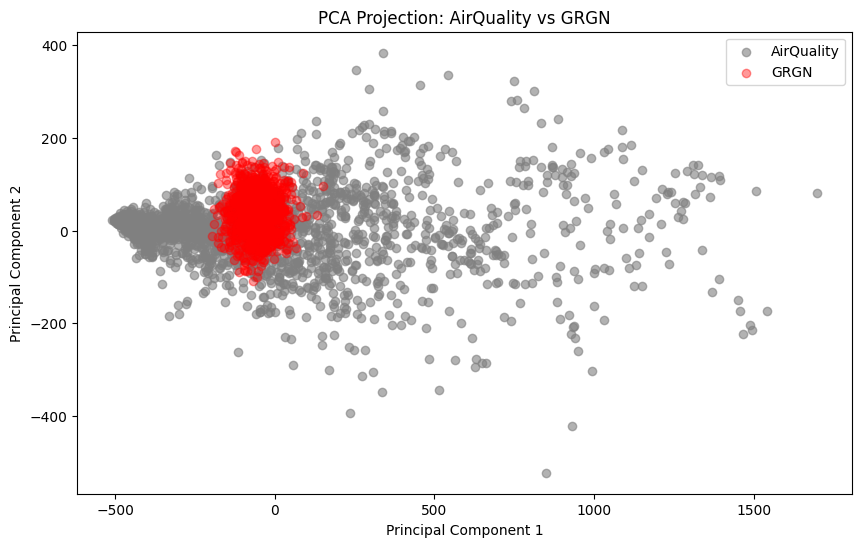

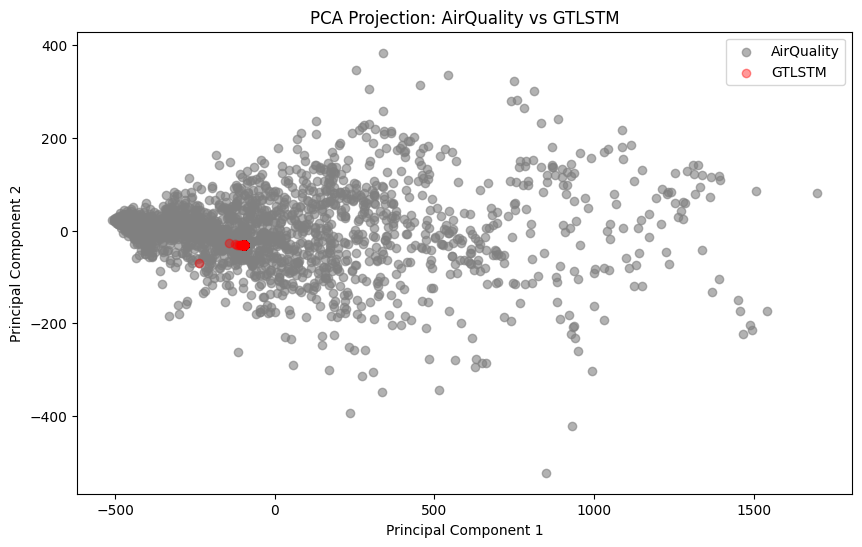

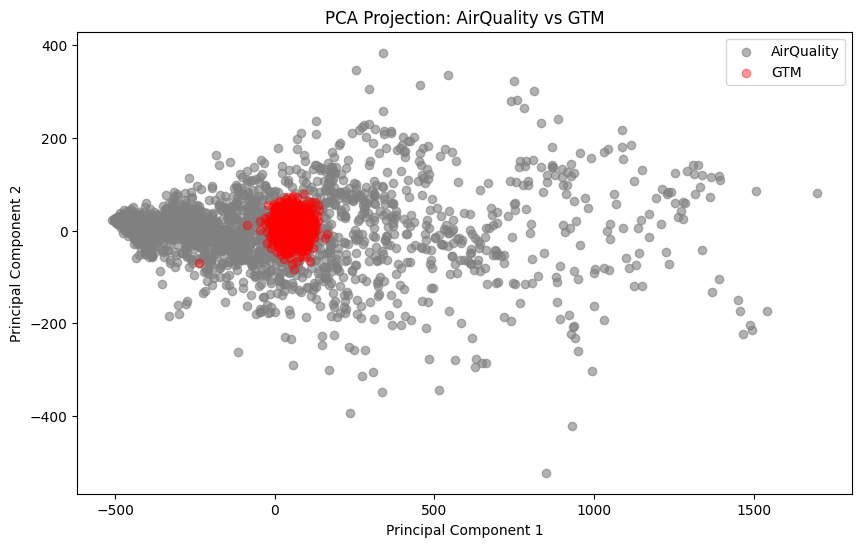

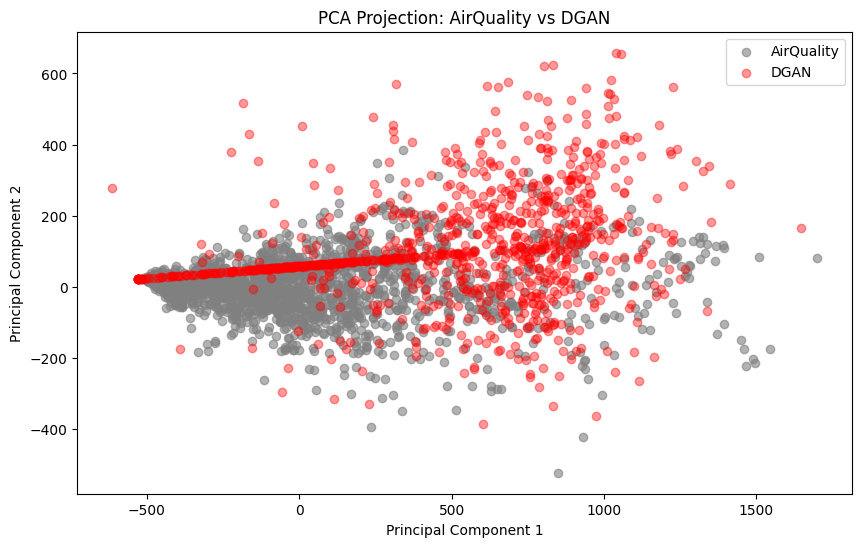

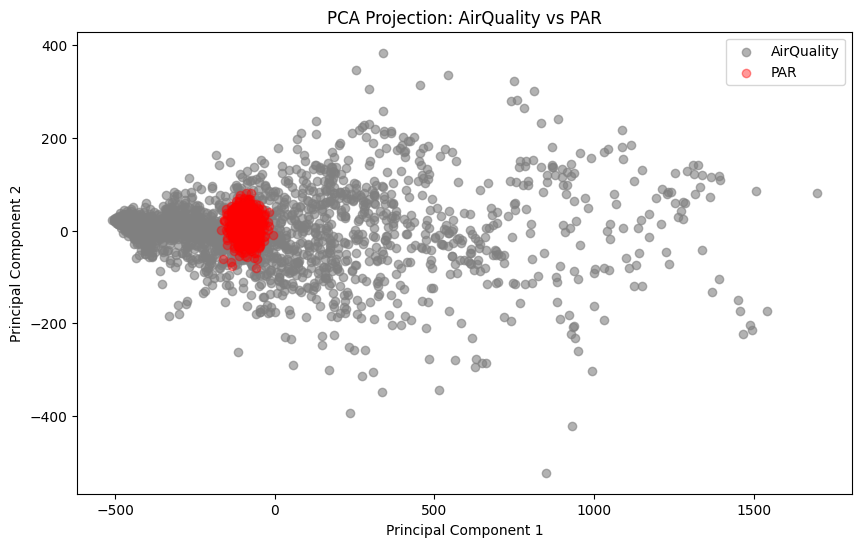

In [146]:
from VisualEval import plot_pca

plot_pca(df_AirQuality, syn_AirQuality_GRGN, 'AirQuality', 'GRGN')
plot_pca(df_AirQuality, syn_AirQuality_GTLSTM, 'AirQuality', 'GTLSTM')
plot_pca(df_AirQuality, syn_AirQuality_GTM, 'AirQuality', 'GTM')
plot_pca(df_AirQuality, syn_AirQuality_dopple, 'AirQuality', 'DGAN')
plot_pca(df_AirQuality, syn_AirQuality_PAR, 'AirQuality', 'PAR')

/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/paulmagos/.pyenv/versions/3.11.9/envs/Dopple/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


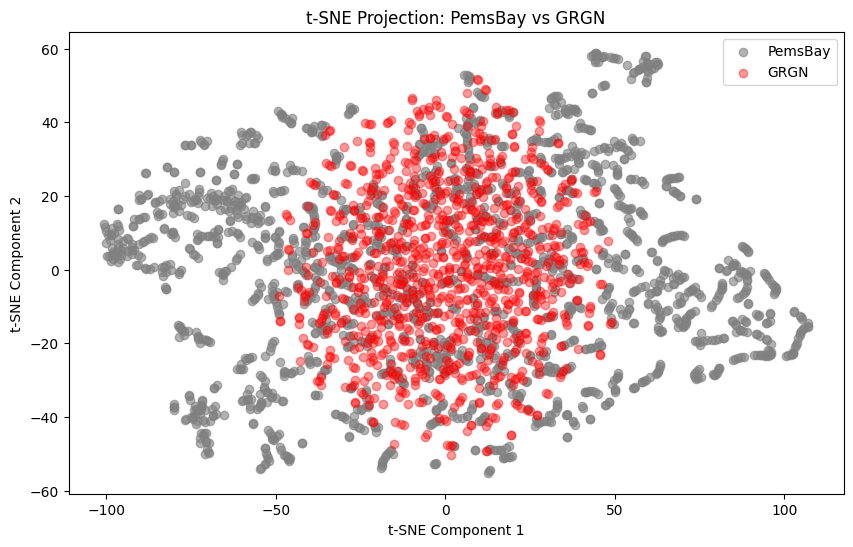

In [147]:
from VisualEval import plot_tsne

plot_tsne(df_AirQuality, syn_AirQuality_GRGN, 'PemsBay', 'GRGN')
# plot_tsne(df_AirQuality, syn_AirQuality_GTLSTM, 'PemsBay', 'GTLSTM')
# plot_tsne(df_AirQuality, syn_AirQuality_GTM, 'PemsBay', 'GTM')
# plot_tsne(df_AirQuality, syn_AirQuality_dopple, 'PemsBay', 'DGAN')
# plot_tsne(df_AirQuality, syn_AirQuality_PAR, 'PemsBay', 'PAR')

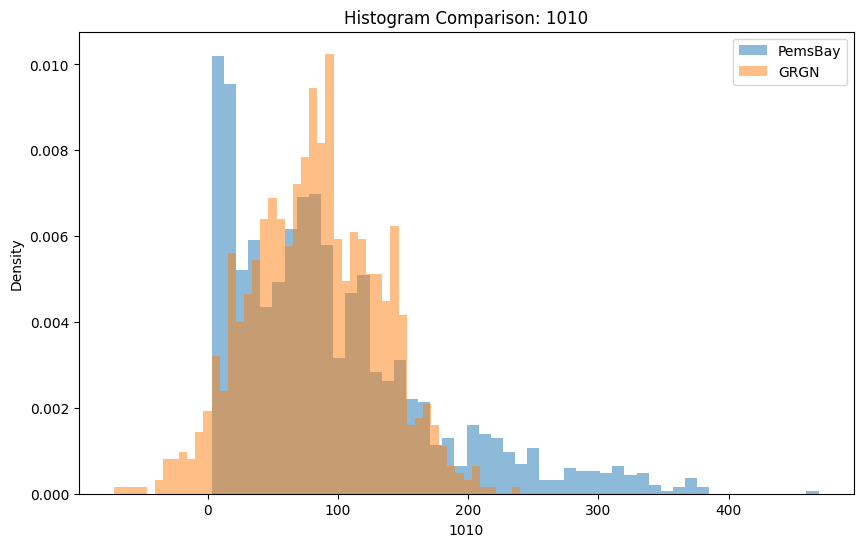

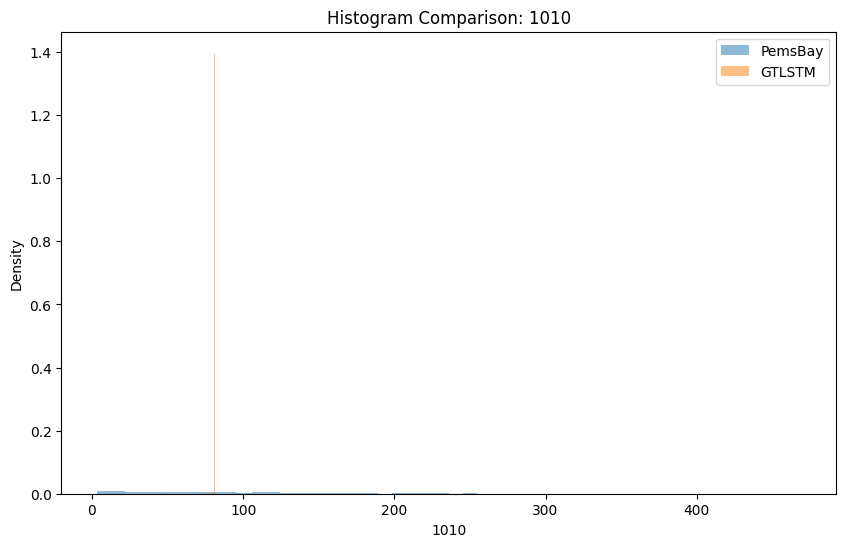

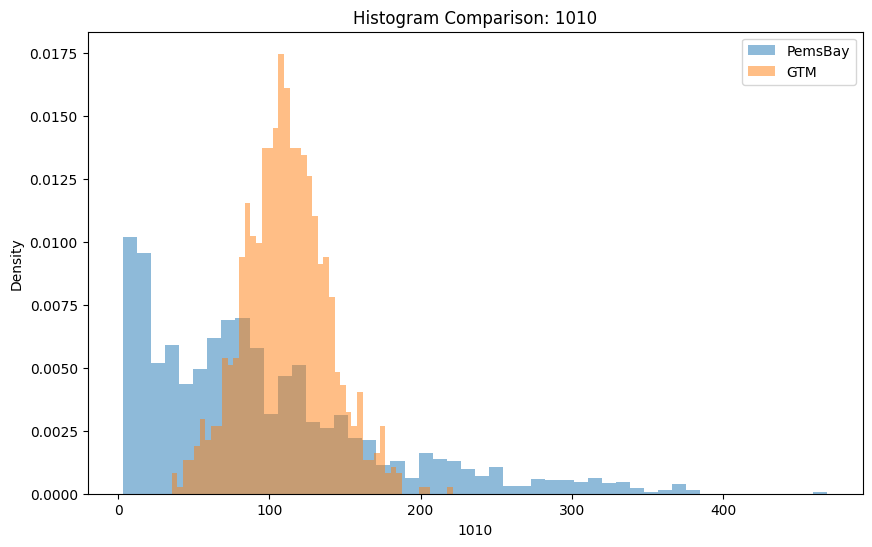

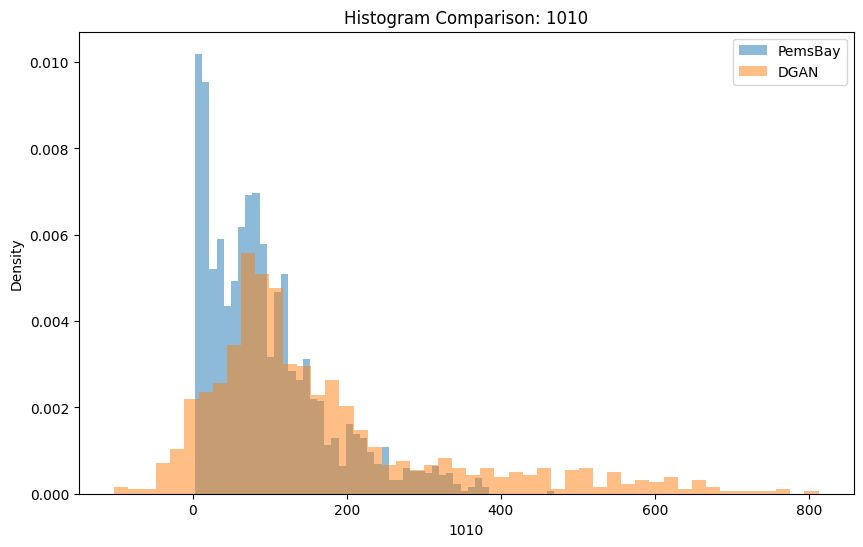

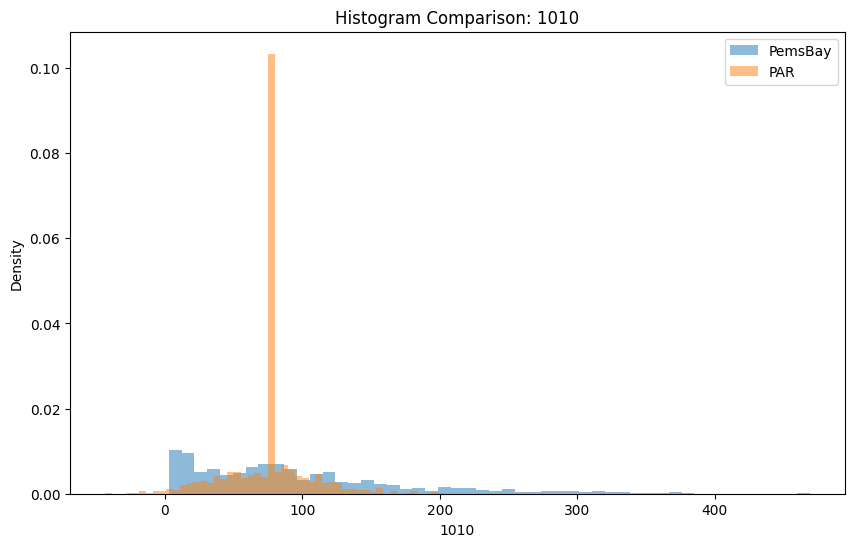

In [148]:
from VisualEval import plot_histograms

plot_histograms(df_AirQuality, syn_AirQuality_GRGN, '1010', 'PemsBay', 'GRGN')
plot_histograms(df_AirQuality, syn_AirQuality_GTLSTM, '1010', 'PemsBay', 'GTLSTM')
plot_histograms(df_AirQuality, syn_AirQuality_GTM, '1010', 'PemsBay', 'GTM')
plot_histograms(df_AirQuality, syn_AirQuality_dopple, '1010', 'PemsBay', 'DGAN')
plot_histograms(df_AirQuality, syn_AirQuality_PAR, '1010', 'PemsBay', 'PAR')

/Users/paulmagos/Documents/TSGen/Notebooks/Eval/VisualEval.py:175: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels)


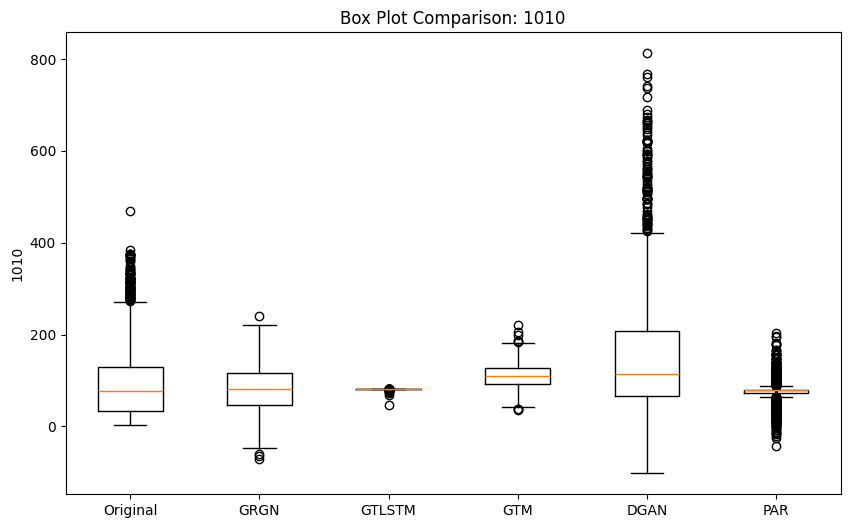

In [149]:
from VisualEval import plot_boxplots_many, plot_boxplots_means, plot_histograms_means

plot_boxplots_many('1010', ('Original', df_AirQuality), 
                   ('GRGN', syn_AirQuality_GRGN), 
                   ('GTLSTM', syn_AirQuality_GTLSTM), 
                   ('GTM', syn_AirQuality_GTM), 
                   ('DGAN', syn_AirQuality_dopple), 
                   ('PAR', syn_AirQuality_PAR))

/Users/paulmagos/Documents/TSGen/Notebooks/Eval/VisualEval.py:202: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels)


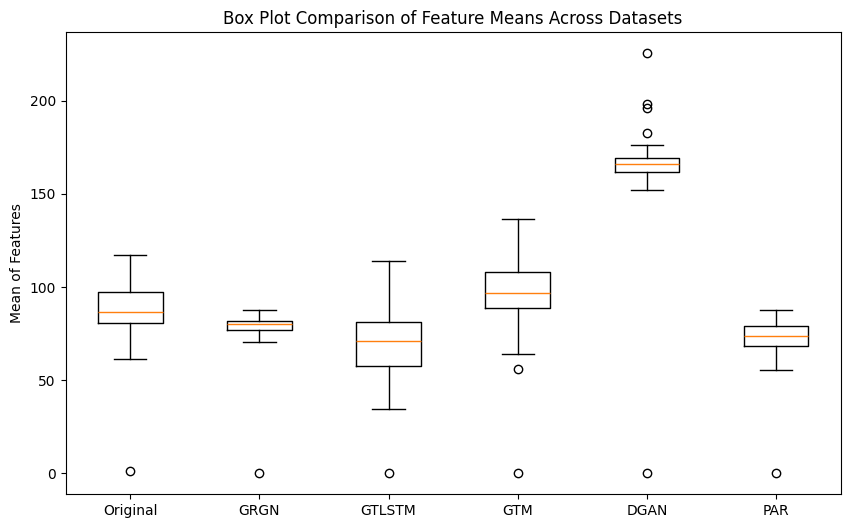

In [150]:
plot_boxplots_means(('Original', df_AirQuality), 
                   ('GRGN', syn_AirQuality_GRGN), 
                   ('GTLSTM', syn_AirQuality_GTLSTM), 
                   ('GTM', syn_AirQuality_GTM), 
                   ('DGAN', syn_AirQuality_dopple), 
                   ('PAR', syn_AirQuality_PAR))

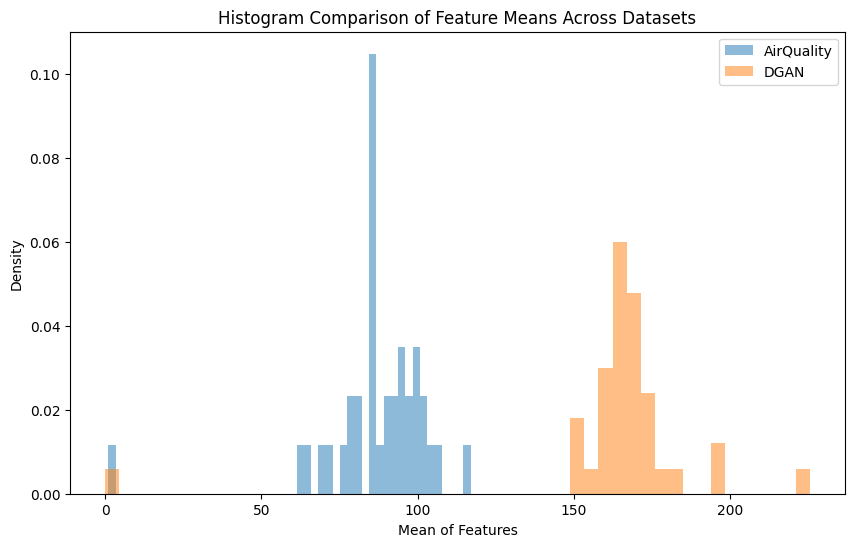

In [151]:
plot_histograms_means(('AirQuality', df_AirQuality), 
                #    ('GRGN', syn_AirQuality_GRGN), 
                  #  ('GTLSTM', syn_PemsBay_GTLSTM), 
                #    ('GTM', syn_AirQuality_GTM),  
                   ('DGAN', syn_AirQuality_dopple), 
                  #  ('PAR', syn_AirQuality_PAR) 
                   )

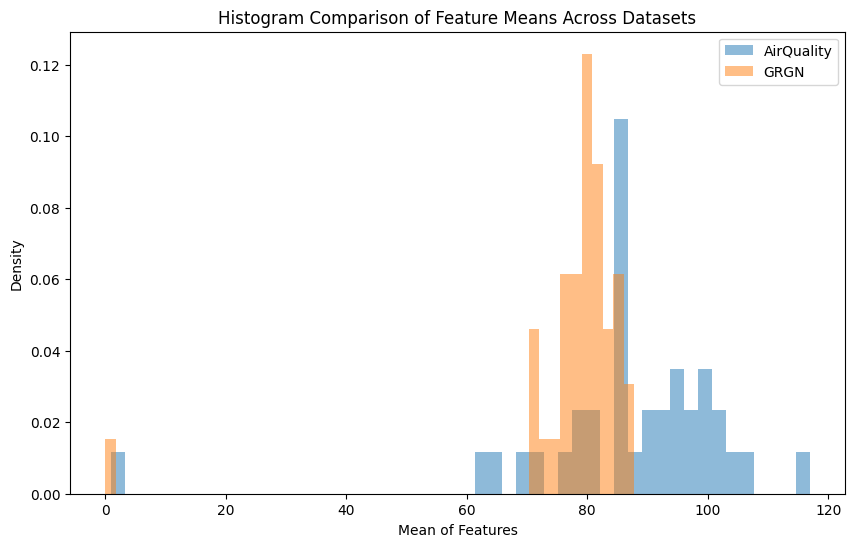

In [152]:
plot_histograms_means(('AirQuality', df_AirQuality), 
                   ('GRGN', syn_AirQuality_GRGN), 
                #    ('GTLSTM', syn_AirQuality_GTLSTM), 
                #    ('GTM', syn_AirQuality_GTM),  
                #    ('DCGAN', syn_AirQuality_dopple), 
                  #  ('PAR', syn_AirQuality_PAR)
                   )

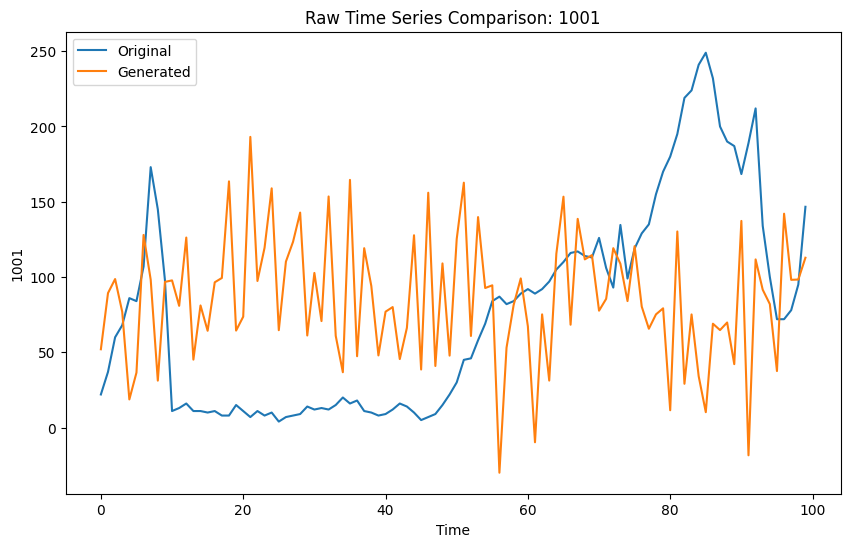

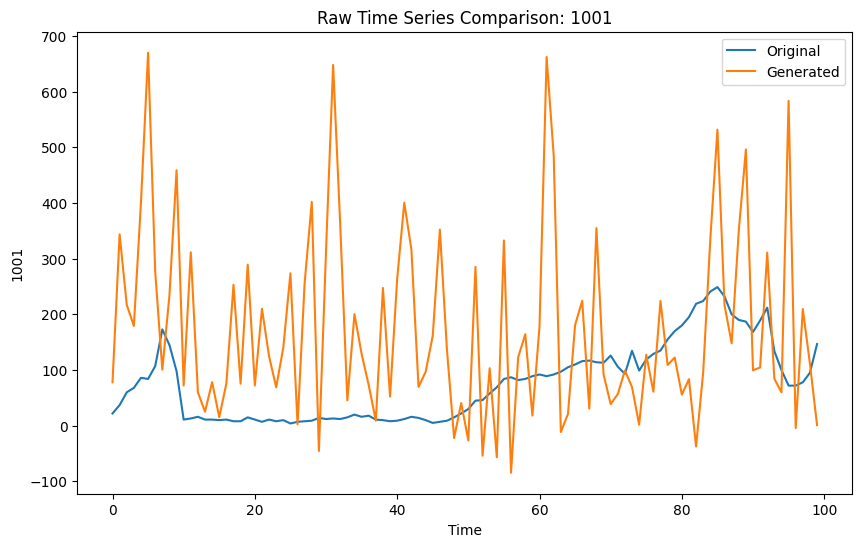

In [153]:
from VisualEval import plot_raw_time_series

plot_raw_time_series(df_AirQuality[-len(df_AirQuality):-(len(df_AirQuality)-100)], syn_AirQuality_GRGN[-len(syn_AirQuality_GRGN):-(len(syn_AirQuality_GRGN)-100)], '1001', 'index')
plot_raw_time_series(df_AirQuality[-len(df_AirQuality):-(len(df_AirQuality)-100)], syn_AirQuality_dopple[-len(syn_AirQuality_dopple):-(len(syn_AirQuality_dopple)-100)], '1001', 'index')